# MOTORBIKE AMBULANCE CALLS ANALYSIS
## DATASET ANALYSIS

In [1]:
# libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
# dataset loading
data = pd.read_csv("motorbike_ambulance_calls.csv", index_col=0)

# let's see some info about our dataset

print(f'Data shape {data.shape}')
print(f'Data containing Nans\n{np.sum(data.isna())}')
data.head()

Data shape (17379, 14)
Data containing Nans
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
index,,,,,,,,,,,,,,
1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [3]:
# let's normalize our categorical data in season column (str=>numerical)

season_encoder = LabelEncoder()
season_encoder.fit(data.season)
data['season'] = season_encoder.transform(data.season)

data.head()

,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
index,,,,,,,,,,,,,,
1,1/1/11,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
2,1/1/11,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
3,1/1/11,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
4,1/1/11,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
5,1/1/11,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


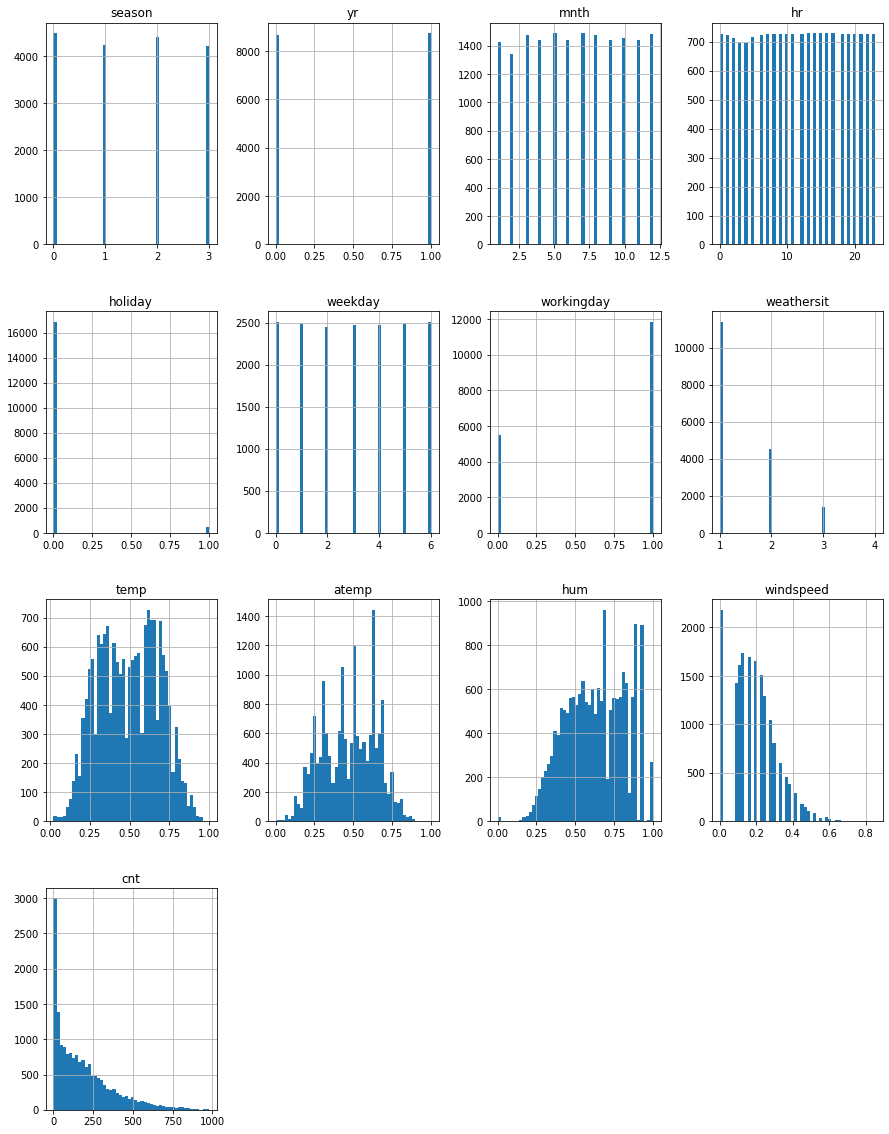

In [4]:
# what is the value distr? 
data.hist(bins=50, figsize=(15, 20))
plt.savefig('./var_hist.png', bbox_inches='tight')
plt.show()

In [5]:
# let's find correlations among the columns => feature selection
corr_matrix = data.corr()
corr_matrix.to_csv('./corr_matrix.csv')
corr_matrix['cnt'].abs().sort_values(ascending=False)

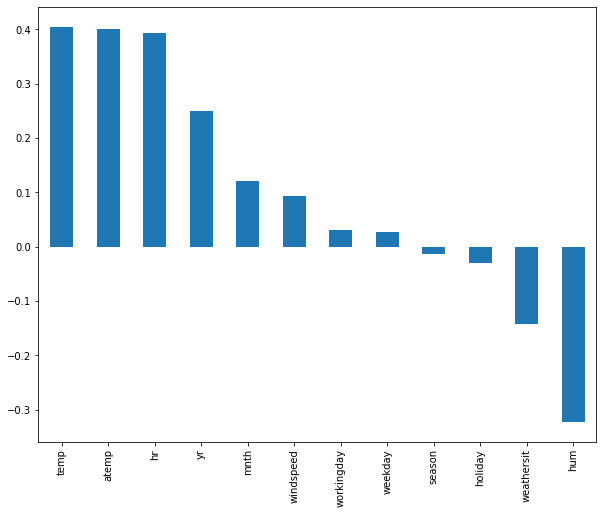

In [6]:
corr_matrix['cnt'].sort_values(ascending=False).drop(['cnt']).plot(kind='bar',figsize=(10, 8))
plt.savefig('./corr_cnt.png')
plt.show()

In [11]:
first_year_calls = data.loc[data['yr'] == 0, 'cnt'].sum()
second_year_calls = data.loc[data['yr'] == 1, 'cnt'].sum()
print("1st year calls: ", first_year_calls)
print("2nd year calls: ", second_year_calls)

1st year calls:  1243103
2nd year calls:  2049576


In [7]:
corr_matrix['temp']

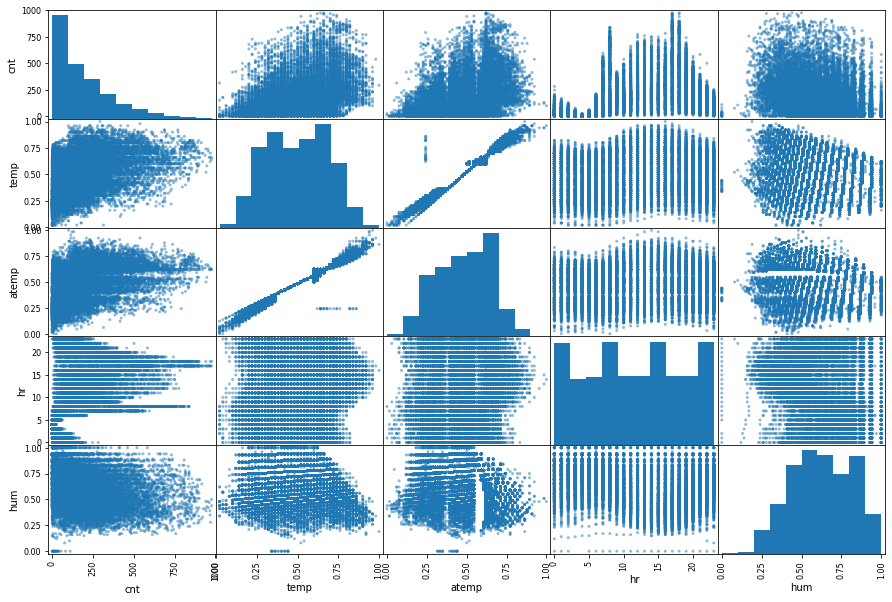

In [8]:


attributes = [
    'cnt',
    'temp',
    'atemp',
    'hr',
    'hum'
]

scatter_matrix(data[attributes], figsize=(15, 10))
plt.savefig('./scatter_matrix.png')
plt.show()

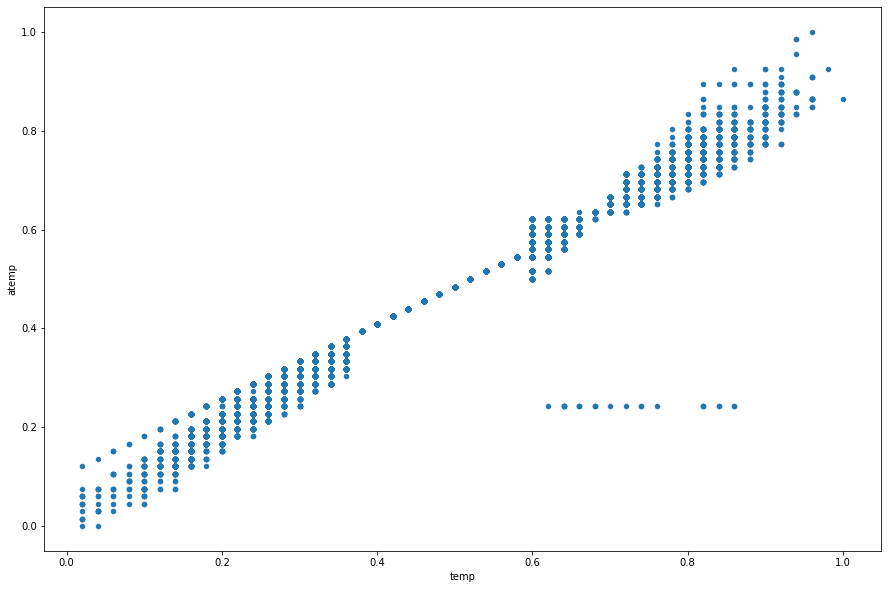

In [9]:
data.plot(kind='scatter', x='temp', y='atemp', figsize=(15, 10))
plt.show()